In [137]:
import numpy   as np
import scipy.misc # to visualize only
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import csv
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import itertools

In [138]:
time1 = time.clock()
# Load data set
x = pd.read_csv("train_x.csv", delimiter=",",header=None).values
time2 = time.clock()
print("Loading training set inputs took " + str(time2-time1) + " seconds")
y = np.loadtxt("train_y.csv", delimiter=",")
x = x.reshape(-1, 64, 64) # reshape
y = y.reshape(-1, 1)

We here
Loading training set inputs took 93.639911 seconds


[  42.   33.   32. ...,  149.  120.   74.]


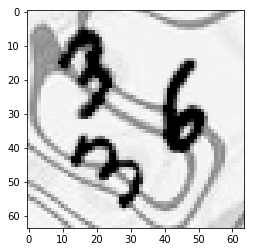

In [140]:
# Shuffle data
random_state = check_random_state(0)
permutation = random_state.permutation(x.shape[0])
x = x[permutation]
y = y[permutation]
X = x.reshape(x.shape[0], -1)

In [155]:
# PCA with 128 principal components
pca = PCA(n_components=128)
X_transformed = pca.fit_transform(X)
plt.show(X_transformed.all())

[ -2.29e+03   6.92e+02  -1.10e+03  -3.13e+02  -6.34e+02   1.39e+02
   8.78e+02  -1.85e+02   1.99e+02  -3.57e+02  -7.21e+01   1.33e+02
  -3.70e+02  -2.35e+02   5.85e+02  -4.89e+02   1.79e+02   6.97e+02
  -1.38e+02  -4.41e+02   2.22e+02   3.55e+02  -4.13e+02  -5.29e+02
   1.08e+02   3.84e+02   1.72e+02  -1.13e+01  -3.46e+02   5.25e+01
  -3.64e+02   3.45e+02   3.74e+02  -4.61e+02  -9.58e+01   1.59e+02
  -2.08e+02   4.86e+01  -5.95e+02   2.29e+02  -5.77e+01  -3.08e+02
  -2.69e+02   3.72e+02   5.31e+02  -4.75e+02   5.83e+01   1.03e+02
   8.57e+01   1.42e+02  -1.34e+02  -2.92e+02  -1.64e+02  -6.43e+01
   3.91e+02  -9.92e+01  -2.88e+02   2.63e+02  -8.14e+02   7.80e+01
   1.66e+02   1.27e+02  -7.65e+01   2.25e+02   2.77e+02   1.55e+02
   2.14e+02   6.27e+01   4.70e+01  -8.92e+01  -9.61e+01  -1.31e+02
   6.30e+01   2.58e+01   1.07e+02  -1.42e+01  -3.88e+01   4.11e+02
  -2.11e+02  -1.91e+01   2.12e+02  -2.25e+01   2.55e+02  -3.88e+01
  -4.42e+02  -4.60e+01  -8.96e+01  -2.38e+02   3.27e+02  -5.59

In [156]:
# Split according to 80-20 cross-validation scheme
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, train_size=40000, test_size=9999)

In [157]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Classifier
clf = LogisticRegression(multi_class='ovr', penalty='l1', solver='saga')
# Fit to training data
clf.fit(X_train,y_train)
score = clf.score(X_test,y_test) * 100
print("Test score: %.4f" % score )

Test score: 11.3611


In [159]:
# This piece of code was taken from Scikit documentation for plotting learning curves
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
    plt.legend(loc="best")
    return plt

In [160]:
# Cross validation with 5 iterations each time with 20% data randomly selected as a validation set.
title = "Learning Curves (Logistic Regression, C=0.01)"
#Scale data
X_scaled = scaler.fit_transform(X_transformed)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LogisticRegression(C=0.01, multi_class='ovr', penalty='l1', solver='saga')
plt = plot_learning_curve(estimator, title, X_scaled, y, cv=cv, n_jobs=4)

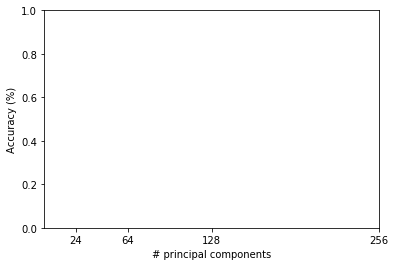

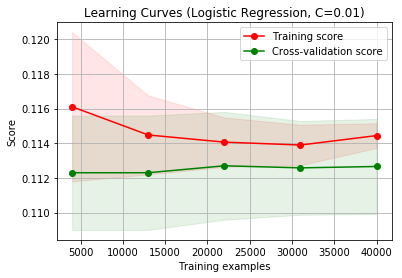

In [161]:
plt.show()

In [151]:
# Test data
x_test_kaggle = pd.read_csv("test_x.csv", delimiter=",", header=None).values
print(len(x_test_kaggle))

10000


In [152]:
# Apply PCA and scale data
X_transformed_kaggle = pca.fit_transform(x_test_kaggle)
X_scaled_2 = scaler.fit_transform(X_transformed_kaggle)

In [153]:
# Predict with classifier
x_prediction = clf.predict(X_scaled_2)

In [154]:
# Output data
with open('output.csv', "wb") as csvfile:
    writer = csv.writer(csvfile)
    header = "Id"
    category = "Label"
    writer.writerow([header] + [category])
    print(len(x_prediction))
    print(x_prediction[9998])
    for i in range(len(x_prediction)):
        writer.writerow([i+1] + [int(x_prediction[i])])

10000
0.0
